In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import radius_neighbors_graph
import networkx as nx
import pygraphviz as pgv

In [64]:
data_path = '/home/avsngh/Mathematical Statistics/Masters-Projects/Unsupervised-Learning/Data/Star_Data.txt'
data = pd.read_csv(filepath_or_buffer=data_path, sep='\s+', header=None)
data.columns = ['col1','col2']
data.describe()


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1084/3528550475.py:2: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(filepath_or_buffer=data_path, sep='\s+', header=None)


,col1,col2
count,300.000000,300.000000
mean,1.845978,1.916265
std,3.285631,3.189663
min,-8.596210,-10.397900
25%,-0.100715,-0.211525
50%,0.913434,1.032485
75%,4.728117,4.767050
max,11.958900,9.660530


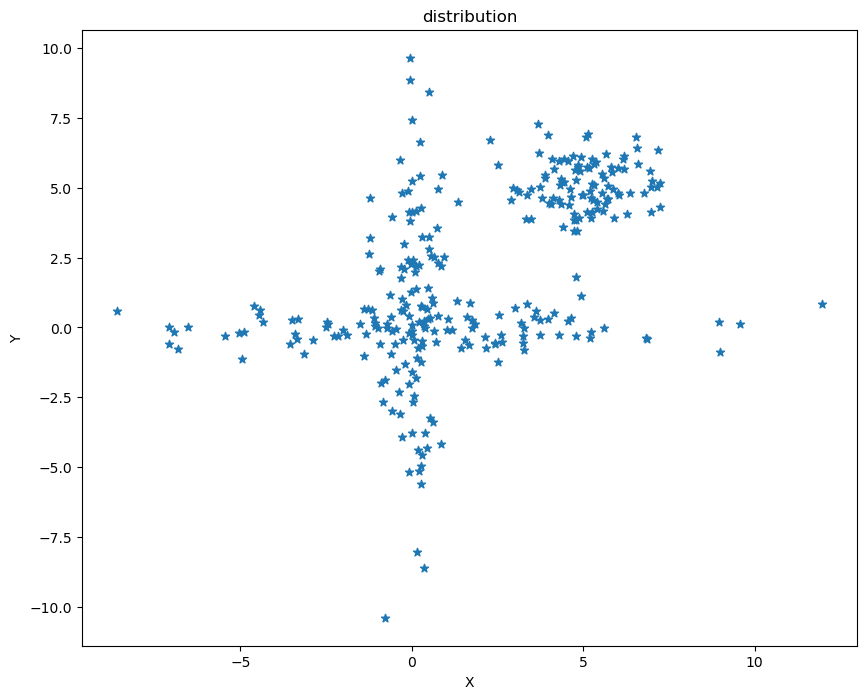

In [65]:
plt.figure(figsize=(10,8))
plt.scatter(data['col1'], data['col2'], marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('distribution')
plt.show()


## Creating ε neighbourhood graph

In [66]:
epsilon = 1.5
sim_matrix = radius_neighbors_graph(X=data, radius= epsilon, mode='distance', metric='euclidean', n_jobs=-1)

In [67]:
print(sim_matrix.getrow(4))

  (0, 65)	1.3984427854853412
  (0, 9)	1.3450742858682565
  (0, 48)	1.496699105724327
  (0, 3)	1.0435429369335982
  (0, 25)	0.9379410647796587
  (0, 71)	1.0178618074886199
  (0, 40)	1.1669890704561035
  (0, 45)	0.45366430076544484
  (0, 10)	0.17996734291531902
  (0, 35)	0.22666018379062497


In [68]:
# using networkx library we create a graph which we will visualize in the next step
nx_graph = nx.from_scipy_sparse_array(sim_matrix)

In [69]:
pgv_graph = nx.nx_agraph.to_agraph(nx_graph)

In [70]:
pgv_graph.draw(path='/home/avsngh/Mathematical Statistics/Masters-Projects/Unsupervised-Learning/test.png', format='jpeg', prog='dot' )

/home/avsngh/anaconda3/envs/msenv/lib/python3.12/site-packages/pygraphviz/agraph.py:1403: RuntimeWarning: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.334983 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
